<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbers from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

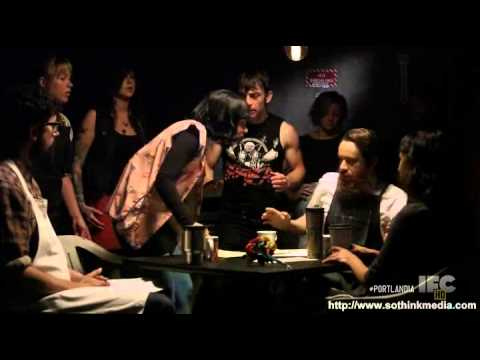

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\Neal\\Documents\\Lambda_Classnotes\\lambdata_ds11\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [16]:
len(shops)

7616

## Make a new column for the star rating as just an int

In [4]:
# check the values
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [8]:
shops['star_rating']

0        5.0 star rating 
1        4.0 star rating 
2        4.0 star rating 
3        2.0 star rating 
4        4.0 star rating 
              ...        
7611     4.0 star rating 
7612     5.0 star rating 
7613     4.0 star rating 
7614     3.0 star rating 
7615     4.0 star rating 
Name: star_rating, Length: 7616, dtype: object

In [9]:
# Since the ratings are all whole numbers we can just extract that value
shops['star_rating'].astype(str).str[1]

0       5
1       4
2       4
3       2
4       4
       ..
7611    4
7612    5
7613    4
7614    3
7615    4
Name: star_rating, Length: 7616, dtype: object

In [10]:
shops['stars'] = shops['star_rating'].astype(str).str[1]

In [12]:
# Recast as int now
shops['stars'] = shops['stars'].astype(int)

In [15]:
# I want to look at the whole text of some reviews
for i in range(5):
    print(shops['full_review_text'][i])
    print('-'*40)

 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? 
----------------------------------------
 12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!!  Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about.  But, will probably be back just to be somewhere unique and nice. 
----------------------------------------
 11/30/2016 1 check-in Listed in Brunch Spots 

## Get rid of the dates

In [17]:
import re

In [32]:
def date_strip(text):
    """ Takes a string and removes a date of the format ##/##/#### if any.
    
    Args: text (str) to strip a date from.
    
    Returns: text (str) without the date.
    """
    #new_text = re.sub('\d{2}/\d{2}/\d{4}', '', text)
    new_text = re.sub('\d+/\d+/\d+', '', text)
    
    return new_text
    

In [22]:
type(shops['full_review_text'][0])

str

In [33]:
date_strip(shops['full_review_text'][0])

'  1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [34]:
shops['review_no_date'] = ''
for i in range(len(shops)):
    shops['review_no_date'][i] = date_strip(shops['full_review_text'][i])
    

C:\Users\Neal\Anaconda3\envs\U4-NLP\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,stars,review_no_date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,1 check-in Love love loved the atmosphere! E...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,"Listed in Date Night: Austin, Ambiance in Au..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,1 check-in Listed in Brunch Spots I loved th...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,Very cool decor! Good drinks Nice seating H...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,1 check-in They are located within the North...


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [36]:
"""
Import Statements
"""

# Base
from collections import Counter
import re  # I know I already imported this above.
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [38]:
def tokenize(text):
    """ from Jon-Cody Sokoll
    Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [39]:
shops['tokens'] = shops['review_no_date'].apply(tokenize)

In [40]:
shops['tokens']

0       [1, check-in, love, love, loved, the, atmosphe...
1       [listed, in, date, night:, austin,, ambiance, ...
2       [1, check-in, listed, in, brunch, spots, i, lo...
3       [very, cool, decor!, good, drinks, nice, seati...
4       [1, check-in, they, are, located, within, the,...
                              ...                        
7611    [i, actually, step, into, this, restaurant, by...
7612    [ok,, the, steeping, room, is, awesome., how, ...
7613    [loved, coming, here, for, tea,, and, the, atm...
7614    [the, food, is, just, average., the, booths, d...
7615    [i, finally, stopped, in, for, lunch, with, my...
Name: tokens, Length: 7616, dtype: object

In [44]:
shops['token_count'] = shops['tokens'].str.len()

In [45]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,stars,review_no_date,tokens,token_count
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,1 check-in Love love loved the atmosphere! E...,"[1, check-in, love, love, loved, the, atmosphe...",97
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,"Listed in Date Night: Austin, Ambiance in Au...","[listed, in, date, night:, austin,, ambiance, ...",47
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,1 check-in Listed in Brunch Spots I loved th...,"[1, check-in, listed, in, brunch, spots, i, lo...",240
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,Very cool decor! Good drinks Nice seating H...,"[very, cool, decor!, good, drinks, nice, seati...",67
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,1 check-in They are located within the North...,"[1, check-in, they, are, located, within, the,...",116


In [49]:
shops.groupby('stars')['token_count'].mean()

stars
1    124.276978
2    125.821739
3    117.682927
4    109.948729
5     89.741270
Name: token_count, dtype: float64

## Looks like the better the coffee shop the fewer the words used in the review.

### What about after removing the stop words, though?

In [51]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [53]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['review_no_date'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens-stop'] = tokens

In [54]:
shops['tokens-stop'].head()

0    [  , 1, check-in, love, love, loved, atmospher...
1    [  , listed, date, night:, austin,, ambiance, ...
2    [  , 1, check-in, listed, brunch, spots, loved...
3    [  , cool, decor!, good, drinks, nice, seating...
4    [  , 1, check-in, located, northcross, mall, s...
Name: tokens-stop, dtype: object

In [55]:
shops['tokens-stop_count'] = shops['tokens-stop'].str.len()

In [56]:
shops.groupby('stars')['tokens-stop_count'].mean()

stars
1    62.003597
2    63.676087
3    61.070461
4    58.877542
5    48.581746
Name: tokens-stop_count, dtype: float64

## Still fewer words associated with a higher rating; especially with a 5 star.

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [46]:
""" Here's what I am thinking I need to do:
    Separate the 'good' ratings from the 'bad' ratings.
    Get a set of words for the 'good' ratings and another set for the 'bad' ones.
    Make a set of words for the union of both of these sets.
    Get the set of words in the 'good' set minus the union set.
    Get the set of words in the 'bad' set minus the union set.
    Look at the top 5-10 of both of these new sets.
"""

In [57]:
nlp = spacy.load("en_core_web_lg")

def get_lemmas(text):
    """ Lemmas function from Jon-Cody Sokoll """
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [58]:
shops['lemmas'] = shops['review_no_date'].apply(get_lemmas)

In [59]:
shops['lemmas']

0       [  , 1, check, Love, love, love, atmosphere, c...
1       [  , list, Date, Night, Austin, Ambiance, Aust...
2       [  , 1, check, list, Brunch, Spots, love, ecle...
3       [  , cool, decor, good, drink, nice, seating, ...
4       [  , 1, check, locate, Northcross, mall, shopp...
                              ...                        
7611    [  , actually, step, restaurant, chance, favor...
7612    [  , ok, Steeping, Room, awesome, great, menu,...
7613    [  , love, come, tea, atmosphere, pretty, fres...
7614    [  , food, average, booth, feel, clean, waitst...
7615    [  , finally, stop, lunch, colleague, glad, de...
Name: lemmas, Length: 7616, dtype: object

In [66]:
# Make a set of words from the ratings that are above 3
good_df = shops[shops['stars'] > 3][['lemmas']]

len(good_df)

6140

In [67]:
good_set = set()

In [74]:
good_set.update(set(good_df['lemmas'][0]))

In [76]:
len(good_set)

42

In [77]:
good_set.update(set(good_df['lemmas'][1]))

In [78]:
len(good_set)

64

In [94]:
set(good_df.iloc[4,0])

{' ',
 '  ',
 '1',
 'Cortado',
 'Factory',
 'Latte',
 'Matcha',
 'Viva',
 'atmosphere',
 'cafe',
 'catching',
 'cheap',
 'check',
 'coffee',
 'cold',
 'combination',
 'counter',
 'cozy',
 'cup',
 'cute',
 'date',
 'decor',
 'expect',
 'find',
 'friend',
 'fun',
 'get',
 'go',
 'good',
 'great',
 'honestly',
 'iPad',
 'interaction',
 'latte',
 'like',
 'matcha',
 'maybe',
 'moment',
 'nice',
 'night',
 'novel',
 'order',
 'overall',
 'perfect',
 'pick',
 'place',
 'pretty',
 'price',
 'pricey',
 'right',
 'sit',
 'step',
 'study',
 'super',
 'sweetness',
 'swing',
 'temperature',
 'thing',
 'think',
 'want',
 'wifi',
 'worker'}

In [95]:
for i in range(len(good_df)):
    good_set.update(set(good_df.iloc[i,0]))

In [96]:
len(good_set)

14759

That's a big set of words used in all the good reviews.

In [97]:
# Make the bad set
bad_set = set()

In [98]:
bad_df = shops[shops['stars'] < 4][['lemmas']]

len(bad_df)

1476

In [99]:
for i in range(len(bad_df)):
    bad_set.update(set(bad_df.iloc[i,0]))

In [100]:
len(bad_set)

7569

In [103]:
intersect_set = good_set.intersection(bad_set)

In [104]:
len(intersect_set)

5493

In [105]:
only_good = good_set - intersect_set
only_bad = bad_set - intersect_set

In [107]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [115]:
good_wc = count(good_df['lemmas'])
bad_wc = count(bad_df['lemmas'])

In [112]:
good_wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,,3411,11661,1.0,0.038747,0.038747,0.555537
25,coffee,3910,8017,2.0,0.026639,0.065386,0.636808
39,,6140,6356,3.0,0.021120,0.086506,1.000000
83,place,3120,4802,4.0,0.015956,0.102463,0.508143
198,good,2931,4348,5.0,0.014448,0.116910,0.477362
...,...,...,...,...,...,...,...
14752,windowed,1,1,14755.0,0.000003,0.999987,0.000163
14755,actuality,1,1,14756.0,0.000003,0.999990,0.000163
14754,crass,1,1,14757.0,0.000003,0.999993,0.000163
14757,digestion,1,1,14758.0,0.000003,0.999997,0.000163


In [113]:
bad_wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
12,,935,3367,1.0,0.039992,0.039992,0.633469
24,coffee,929,2103,2.0,0.024979,0.064971,0.629404
36,,1476,1555,3.0,0.018470,0.083441,1.000000
35,place,752,1225,4.0,0.014550,0.097991,0.509485
18,good,647,1000,5.0,0.011878,0.109869,0.438347
...,...,...,...,...,...,...,...
7562,atop,1,1,7565.0,0.000012,0.999952,0.000678
7559,dull,1,1,7566.0,0.000012,0.999964,0.000678
7560,tasted,1,1,7567.0,0.000012,0.999976,0.000678
7561,imo,1,1,7568.0,0.000012,0.999988,0.000678


In [116]:
good_wc_sifted = good_wc[good_wc['word'].isin(only_good)]

In [117]:
good_wc_sifted

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4584,Venezia,44,52,859.0,0.000173,0.775603,0.007166
1914,passion,42,48,910.0,0.000159,0.784033,0.006840
1726,knowledgable,45,46,937.0,0.000153,0.788227,0.007329
1742,Fleet,26,42,983.0,0.000140,0.794959,0.004235
2678,ROTD,36,36,1119.0,0.000120,0.812533,0.005863
...,...,...,...,...,...,...,...
14752,windowed,1,1,14755.0,0.000003,0.999987,0.000163
14755,actuality,1,1,14756.0,0.000003,0.999990,0.000163
14754,crass,1,1,14757.0,0.000003,0.999993,0.000163
14757,digestion,1,1,14758.0,0.000003,0.999997,0.000163


In [131]:
for i in range(len(good_wc_sifted)):
    good_wc_sifted.iat[i,3] = (i+1)

In [138]:
good_wc_sifted

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,3
4584,Venezia,44.0,52.0,1.0,0.000173,0.775603,0.007166,NaN
1914,passion,42.0,48.0,2.0,0.000159,0.784033,0.006840,NaN
1726,knowledgable,45.0,46.0,3.0,0.000153,0.788227,0.007329,NaN
1742,Fleet,26.0,42.0,4.0,0.000140,0.794959,0.004235,NaN
2678,ROTD,36.0,36.0,5.0,0.000120,0.812533,0.005863,NaN
...,...,...,...,...,...,...,...,...
14755,actuality,1.0,1.0,9263.0,0.000003,0.999990,0.000163,NaN
14754,crass,1.0,1.0,9264.0,0.000003,0.999993,0.000163,NaN
14757,digestion,1.0,1.0,9265.0,0.000003,0.999997,0.000163,NaN
14756,Moroccan,1.0,1.0,9266.0,0.000003,1.000000,0.000163,NaN


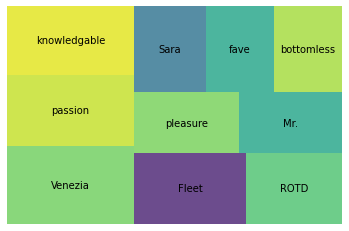

In [139]:
good_wc_top10 = good_wc_sifted[good_wc_sifted['rank'] <= 10]

squarify.plot(sizes=good_wc_top10['pct_total'], label=good_wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [118]:
bad_wc_sifted = bad_wc[bad_wc['word'].isin(only_bad)]

In [119]:
bad_wc_sifted

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
620,Meh,13,13,920.0,0.000154,0.793006,0.008808
2072,Tall,3,12,996.0,0.000143,0.804350,0.002033
1027,subpar,10,10,1117.0,0.000119,0.820147,0.006775
70,Pop+art,4,8,1274.0,0.000095,0.837607,0.002710
418,redo,8,8,1284.0,0.000095,0.838558,0.005420
...,...,...,...,...,...,...,...
7557,Ravi,1,1,7560.0,0.000012,0.999893,0.000678
7564,uneventful,1,1,7561.0,0.000012,0.999905,0.000678
7563,bought,1,1,7562.0,0.000012,0.999917,0.000678
7567,nora,1,1,7563.0,0.000012,0.999929,0.000678


In [140]:
for i in range(len(bad_wc_sifted)):
    bad_wc_sifted.iat[i,3] = (i+1)

In [141]:
bad_wc_sifted

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
620,Meh,13,13,1.0,0.000154,0.793006,0.008808
2072,Tall,3,12,2.0,0.000143,0.804350,0.002033
1027,subpar,10,10,3.0,0.000119,0.820147,0.006775
70,Pop+art,4,8,4.0,0.000095,0.837607,0.002710
418,redo,8,8,5.0,0.000095,0.838558,0.005420
...,...,...,...,...,...,...,...
7557,Ravi,1,1,2072.0,0.000012,0.999893,0.000678
7564,uneventful,1,1,2073.0,0.000012,0.999905,0.000678
7563,bought,1,1,2074.0,0.000012,0.999917,0.000678
7567,nora,1,1,2075.0,0.000012,0.999929,0.000678


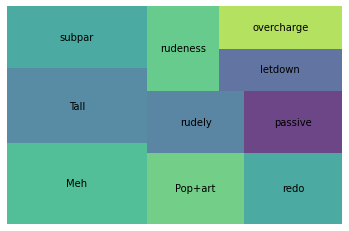

In [142]:
bad_wc_top10 = bad_wc_sifted[bad_wc_sifted['rank'] <= 10]

squarify.plot(sizes=bad_wc_top10['pct_total'], label=bad_wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

